# Student Performance Insights : From Cleaning to Clustering to Classification
## Name:Habiba abdullah said hammad

### Libraries used

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

### Data Prepration

Ok let's first start with downloading the dataset from UCI ML Repository

In [2]:
%pip install ucimlrepo -q
from ucimlrepo import fetch_ucirepo
ds = fetch_ucirepo(id=320)
X = ds.data.features
y = ds.data.targets


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


Let's look at the meta data of the dataset 
meta data is data about data so we will have a deeper understanding of the dataset itself

In [3]:
ds.metadata

{'uci_id': 320,
 'name': 'Student Performance',
 'repository_url': 'https://archive.ics.uci.edu/dataset/320/student+performance',
 'data_url': 'https://archive.ics.uci.edu/static/public/320/data.csv',
 'abstract': 'Predict student performance in secondary education (high school). ',
 'area': 'Social Science',
 'tasks': ['Classification', 'Regression'],
 'characteristics': ['Multivariate'],
 'num_instances': 649,
 'num_features': 30,
 'feature_types': ['Integer'],
 'demographics': ['Sex', 'Age', 'Other', 'Education Level', 'Occupation'],
 'target_col': ['G1', 'G2', 'G3'],
 'index_col': None,
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 2008,
 'last_updated': 'Fri Jan 05 2024',
 'dataset_doi': '10.24432/C5TG7T',
 'creators': ['Paulo Cortez'],
 'intro_paper': {'ID': 360,
  'type': 'NATIVE',
  'title': 'Using data mining to predict secondary school student performance',
  'authors': 'P. Cortez, A. M. G. Silva',
  'venue': 'Proceedings of 5th Ann

This dataset is a *merged* view of the students math scores and porteguse scores
Ok looks like there are 649 students and 30 features. 
it also claims that there is no missing values or even symbols for missing values.
Let's take a look at the variables

In [4]:
pd.set_option("display.max_colwidth",None)
ds.variables

,name,role,type,demographic,description,units,missing_values
0,school,Feature,Categorical,None,student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira),None,no
1,sex,Feature,Binary,Sex,student's sex (binary: 'F' - female or 'M' - male),None,no
2,age,Feature,Integer,Age,student's age (numeric: from 15 to 22),None,no
3,address,Feature,Categorical,None,student's home address type (binary: 'U' - urban or 'R' - rural),None,no
4,famsize,Feature,Categorical,Other,family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3),None,no
5,Pstatus,Feature,Categorical,Other,parent's cohabitation status (binary: 'T' - living together or 'A' - apart),None,no
6,Medu,Feature,Integer,Education Level,"mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)",None,no
7,Fedu,Feature,Integer,Education Level,"father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)",None,no
8,Mjob,Feature,Categorical,Occupation,"mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')",None,no
9,Fjob,Feature,Categorical,Occupation,"father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')",None,no


Ok so most features here are integers except for 
- school 
- sex 
- famsize
- Mjob (Mother's Job)
- Fjob (Father's Job)
- Guardian 


So these would need encoding and given that there are binary features we can one-hot encode them for consistency.
Now let's look at the dataset itself.


In [5]:
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,4
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,2
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,6
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,0


In [6]:
#will need this is in visulaization and EDA
X_original=X.copy()

In [7]:
y.head()

,G1,G2,G3
0,0,11,11
1,9,11,11
2,12,13,12
3,14,14,14
4,11,13,13


Ok for reproduciatlity , I will save the dataset as csv files in the Data folder

In [8]:
X.to_csv("E:\Summer Semester 2\Training\Final Project\Data\student_features.csv",index=False)
y.to_csv("E:\Summer Semester 2\Training\Final Project\Data\student_targets.csv",index=False)

Now that that's setteled, Let's check for duplicates and missing values

In [9]:
dup_count=X.duplicated().sum()
dup_count

0

In [10]:
missing_count=X.isnull().sum()
missing_count

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
dtype: int64

Ok so no duplicates or null values , let's now check for outliers , I will use the IQR method since it is the most simple and when plotted in a box plot it makes it easier to detect outliers while still vieweing the distribution of the features.

This function will check for outliers for all the numeric values 

In [11]:
def detect_outliers_iqr(df, threshold=1.5):
    outlier_summary = {}

    for col in df.select_dtypes(include=["int64"]).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - threshold * IQR
        upper = Q3 + threshold * IQR

        outliers = df[(df[col] < lower) | (df[col] > upper)]
        outlier_summary[col] = {
            "outlier_count": outliers.shape[0],
            "lower_bound": lower,
            "upper_bound": upper,
            "min_value": df[col].min(),
            "max_value": df[col].max()
        }
    return pd.DataFrame(outlier_summary).T.sort_values("outlier_count", ascending=False)


And this function is to plot boxplots

In [12]:
def plot_outliers_boxplots(df):
    numeric_cols = df.select_dtypes(include=["int64"]).columns
    n = len(numeric_cols)

    rows = (n // 2) + (n % 2)
    plt.figure(figsize=(12, 4*rows))

    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(rows, 2, i)
        sns.boxplot(x=df[col], color="skyblue")
        plt.title(f"Boxplot of {col}")
        plt.xlabel(col)

    plt.tight_layout()
    plt.show()

In [13]:
outlier_report=detect_outliers_iqr(X)
outlier_report

,outlier_count,lower_bound,upper_bound,min_value,max_value
failures,100.0,0.0,0.0,0.0,3.0
famrel,51.0,2.5,6.5,1.0,5.0
freetime,45.0,1.5,5.5,1.0,5.0
studytime,35.0,-0.5,3.5,1.0,4.0
Dalc,34.0,-0.5,3.5,1.0,5.0
absences,21.0,-9.0,15.0,0.0,32.0
traveltime,16.0,-0.5,3.5,1.0,4.0
age,1.0,13.0,21.0,15.0,22.0
Medu,0.0,-1.0,7.0,0.0,4.0
Fedu,0.0,-2.0,6.0,0.0,4.0


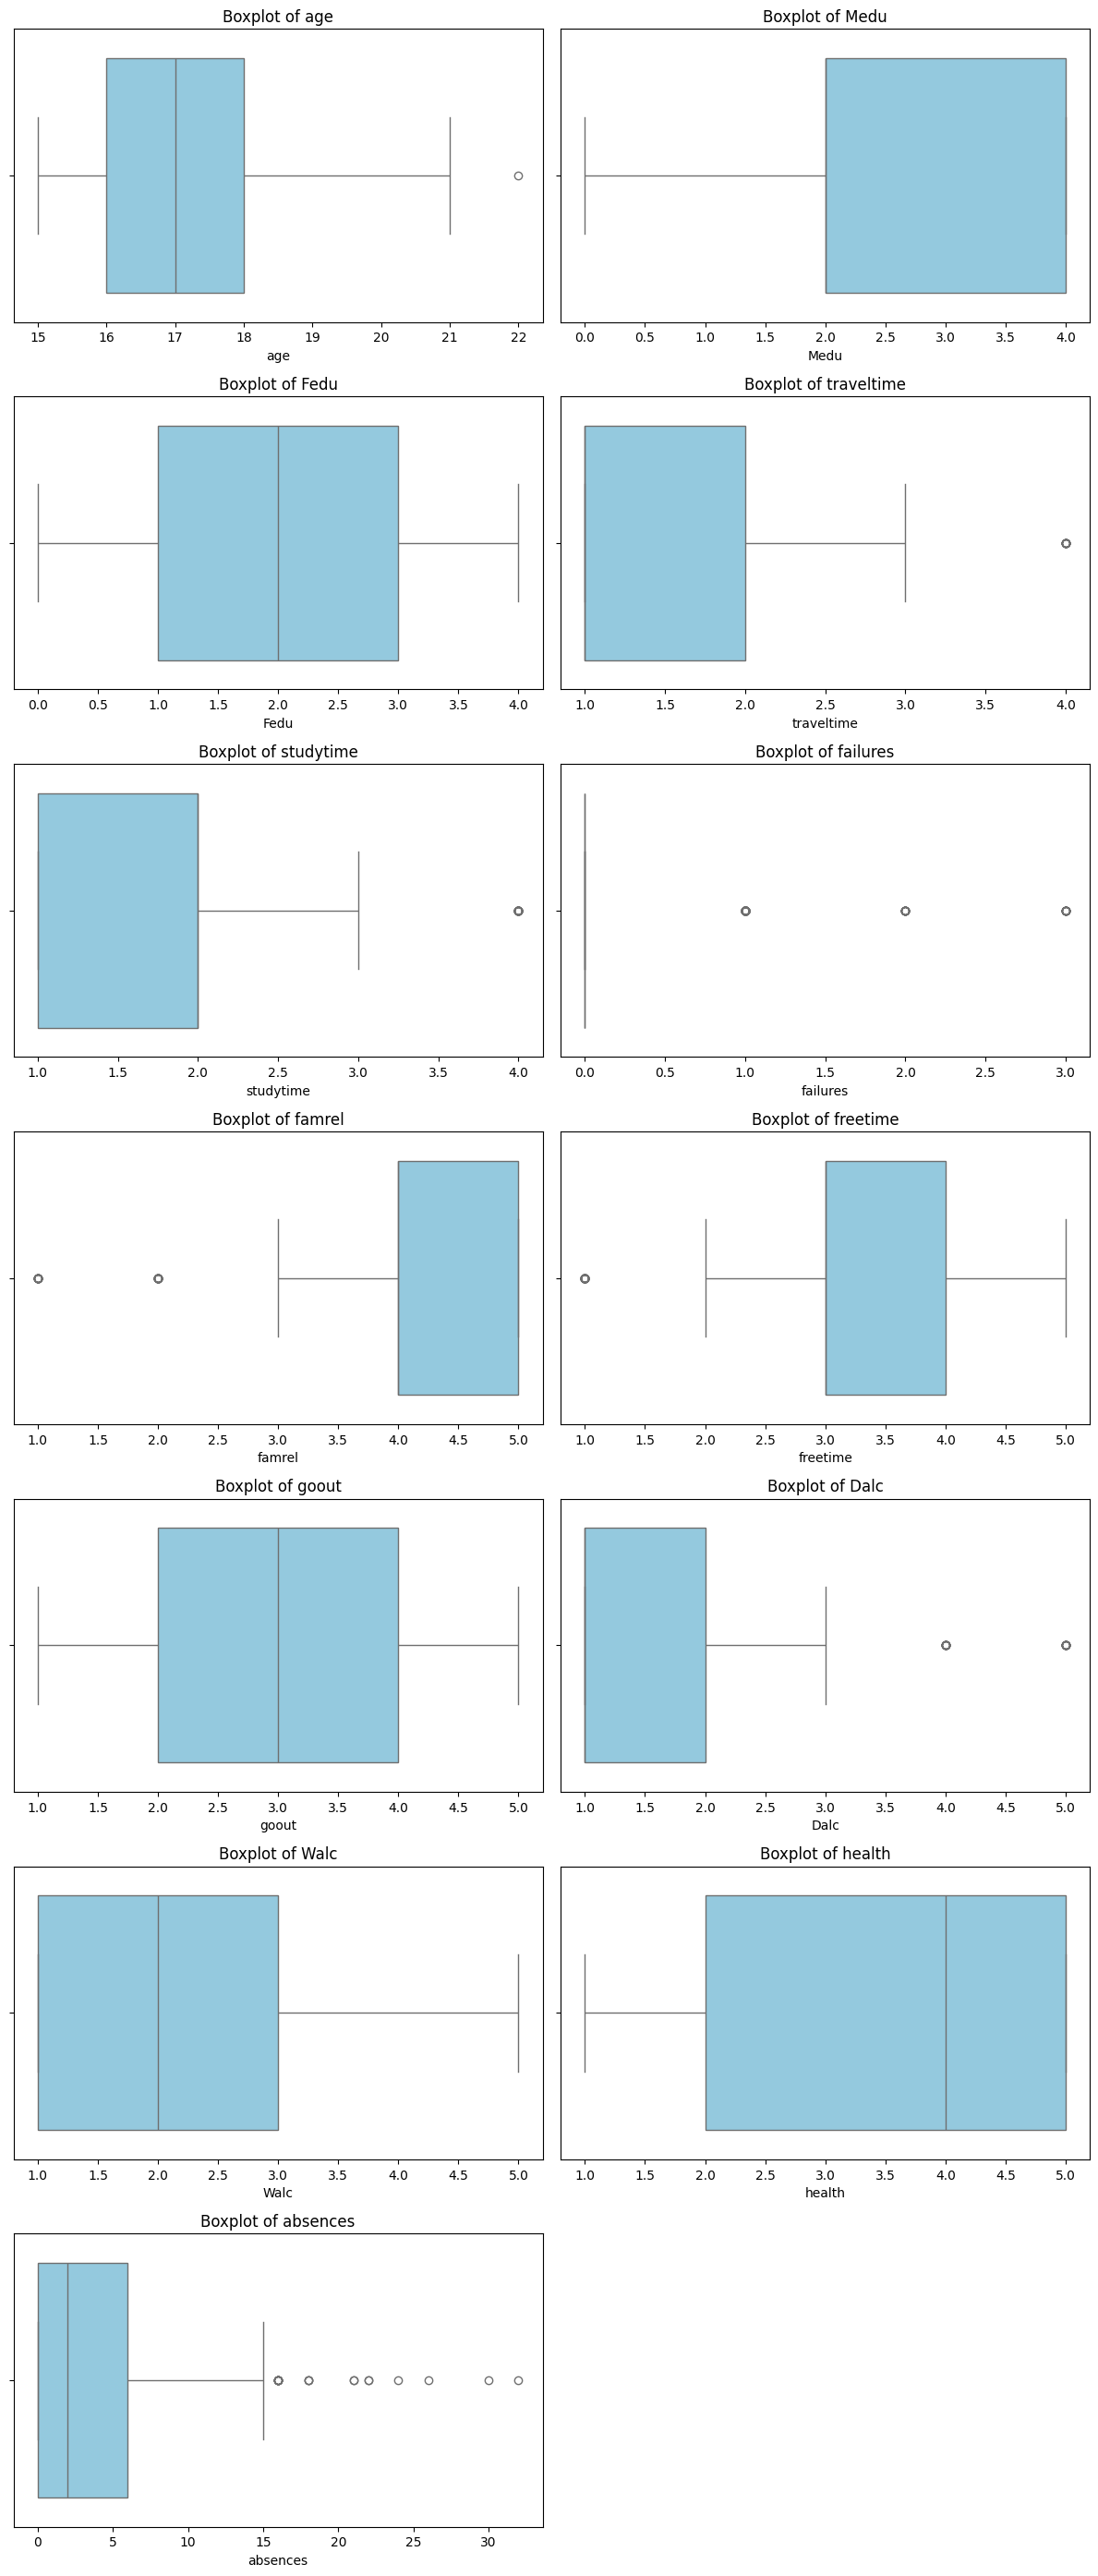

In [14]:
plot_outliers_boxplots(X)

Looking at the features , absences at first glance look a little off but after some thinking , yes some students can have be absent for most of the year (Reasons could be Travel) but to not let it affect the model , we can replace the values beyond a threshold with the nearest non-outlier value.

Now for featues like Famrel , FreeTime and Dalc (Daily alcoholic consumption) have some outliers but theya re not significant and are also logical. 

Finally , the failures feature , at first glance , looks like it needs to be dropped right away but actually it is an ordinal Categorical value with values ranging from 0 (no past failures) to 3 (3 or more past failures)

Let's cap absences at 95th percentile for top 5% of values above 30 

In [15]:
upper=X['absences'].quantile(0.95)
X['absences']=X['absences'].clip(upper=upper)

C:\Users\20115\AppData\Local\Temp\ipykernel_33876\3859072732.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['absences']=X['absences'].clip(upper=upper)


In [16]:
Q1 = X['absences'].quantile(0.25)
Q3 = X['absences'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound for absences: {lower_bound}")
print(f"Upper Bound for absences: {upper_bound}")

Lower Bound for absences: -9.0
Upper Bound for absences: 15.0


In [17]:
outliers_lower_after = (X['absences'] < lower_bound).sum()
outliers_upper_after = (X['absences'] > upper_bound).sum()
total_outliers_after = outliers_lower_after + outliers_upper_after

print(f"Lower Outliers after capping: {outliers_lower_after}")
print(f"Upper Outliers after capping: {outliers_upper_after}")
print(f"Total Outliers after capping: {total_outliers_after}")

Lower Outliers after capping: 0
Upper Outliers after capping: 0
Total Outliers after capping: 0


Now the maximum value is 12 absences. Let's go on to the target features

In [18]:
outlier_target_report=detect_outliers_iqr(y)
outlier_target_report

,outlier_count,lower_bound,upper_bound,min_value,max_value
G2,25.0,5.5,17.5,0.0,19.0
G1,16.0,5.5,17.5,0.0,19.0
G3,16.0,4.0,20.0,0.0,19.0


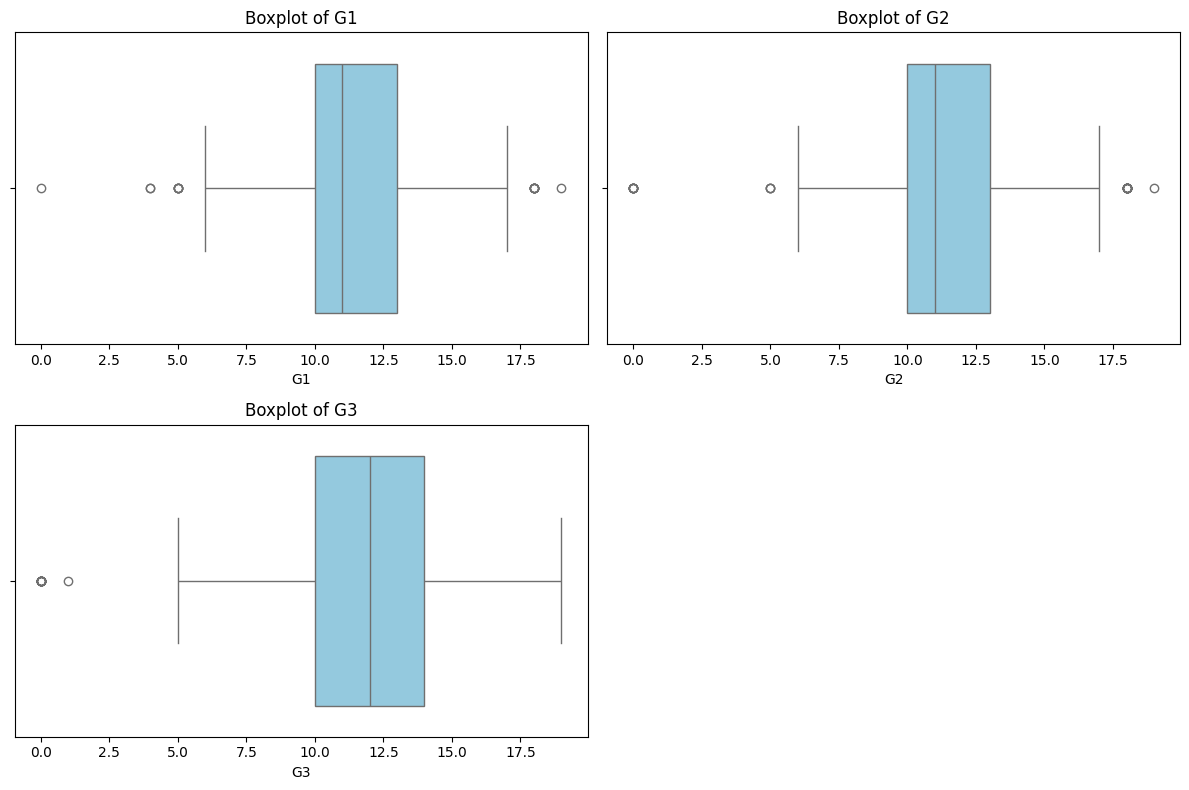

In [19]:
plot_outliers_boxplots(y)

So looking at the target features , there seemes to be no issue since they are withtin the range of 0-20 which is stated in the 'variable_info' in the metadata. Yes there is some outliers but they are logical since students can get a zero or get a below average score therfore the target dataframe stays as is.

Data Quality Report Can be found in the Reports Folder

### Data Transformation

First step in Data Transformation is Encoding 
I wil use one-hot encoding for categorical and binary features

In [20]:
Categorical_columns=['school','address','famsize','Pstatus','Mjob','Fjob','reason','guardian']
binary_columns=['sex','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']


First let's handle the binary features

In [21]:
for col in binary_columns:
    X[col]=X[col].map({"yes":1,"no":0}).fillna(X[col])
    if col=="sex":
        X[col]=X[col].map({"F":0,"M":1})

C:\Users\20115\AppData\Local\Temp\ipykernel_33876\2734701372.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col]=X[col].map({"yes":1,"no":0}).fillna(X[col])
C:\Users\20115\AppData\Local\Temp\ipykernel_33876\2734701372.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col]=X[col].map({"F":0,"M":1})
C:\Users\20115\AppData\Local\Temp\ipykernel_33876\2734701372.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

Now onto the categorical features

In [22]:
X=pd.get_dummies(X,columns=Categorical_columns,drop_first=True)

In [23]:
X.head()

,sex,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,...,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
0,0,18,4,4,2,2,0,1,0,0,...,False,False,False,False,True,False,False,False,True,False
1,0,17,1,1,1,2,0,0,1,0,...,False,False,True,False,False,False,False,False,False,False
2,0,15,1,1,1,2,0,1,0,0,...,False,False,True,False,False,False,True,False,True,False
3,0,15,4,2,1,3,0,0,1,0,...,False,False,False,True,False,True,False,False,True,False
4,0,16,3,3,1,2,0,0,1,0,...,False,False,True,False,False,True,False,False,False,False


Now that the encoding is settled , let's go on to scaling for numeric features. Since I will be using KNN it is important for all the numeric features to be scaled

In [24]:
from sklearn.preprocessing import StandardScaler
numeric_features=['age','Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','Dalc','Walc','health','absences']
scaler=StandardScaler()
X[numeric_features]=scaler.fit_transform(X[numeric_features])
X[numeric_features].head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
0,1.031695,1.310216,1.540715,0.576718,0.083653,-0.374305,0.072606,-0.171647,0.693785,-0.543555,-0.997695,-0.371042,0.166182
1,0.210137,-1.336039,-1.188832,-0.760032,0.083653,-0.374305,1.119748,-0.171647,-0.157380,-0.543555,-0.997695,-0.371042,-0.367739
2,-1.432980,-1.336039,-1.188832,-0.760032,0.083653,-0.374305,0.072606,-0.171647,-1.008546,0.538553,0.560678,-0.371042,0.700102
3,-1.432980,1.310216,-0.278983,-0.760032,1.290114,-0.374305,-0.974536,-1.123771,-1.008546,-0.543555,-0.997695,1.012903,-0.901659
4,-0.611422,0.428131,0.630866,-0.760032,0.083653,-0.374305,0.072606,-0.171647,-1.008546,-0.543555,-0.218508,1.012903,-0.901659


Now all the values range from -3 to +3

Now We can go on to feature engineering.
We will do two things 
1. Average of G1-G3 
2. Attendance Proxy
3. Family academic Enviroment
4. Support Index
5. Lifestyle Score
6. Risk Group 

In [25]:
X["G1"]=y['G1']
X['G2']=y['G2']
X['G3']=y['G3']

Attendence Proxy

In [26]:
def attendence_bucket(x):
    if x<=5: return "Low"
    if x<=15: return "Medium"
    return "High"
X['attendance_proxy']=X_original['absences'].apply(attendence_bucket)
X["attendance_rate"] = 1 - (X_original['absences'] / X_original['absences'].max())
X['attendance_rate']

0      0.8750
1      0.9375
2      0.8125
3      1.0000
4      1.0000
        ...  
644    0.8750
645    0.8750
646    0.8125
647    0.8125
648    0.8750
Name: attendance_rate, Length: 649, dtype: float64

Risk Group (for classification)

In [27]:
def risk_group(g3):
    if g3<=9: return "High"
    if g3<=14: return "Medium"
    return "Low"
X['risk_group']=y['G3'].apply(risk_group)

Average of G1-G3

In [28]:
X['avg_grade']=(X['G1']+X['G2']+X['G3'])/3

Now we need to consider leakage 
having G1 and G2 would make it easy for the model to predict G3 and can cause leakage 
so to surpass this we will have 2 dataframes 
one with G1 and G2 
nd one without G1 and G2

In [29]:
df_with=X.drop(columns=['G3','risk_group'])
df_with

,sex,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,...,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,G1,G2,attendance_proxy,attendance_rate,avg_grade
0,0,1.031695,1.310216,1.540715,0.576718,0.083653,-0.374305,1,0,0,...,False,False,False,True,False,0,11,Low,0.8750,7.333333
1,0,0.210137,-1.336039,-1.188832,-0.760032,0.083653,-0.374305,0,1,0,...,False,False,False,False,False,9,11,Low,0.9375,10.333333
2,0,-1.432980,-1.336039,-1.188832,-0.760032,0.083653,-0.374305,1,0,0,...,False,True,False,True,False,12,13,Medium,0.8125,12.333333
3,0,-1.432980,1.310216,-0.278983,-0.760032,1.290114,-0.374305,0,1,0,...,True,False,False,True,False,14,14,Low,1.0000,14.000000
4,0,-0.611422,0.428131,0.630866,-0.760032,0.083653,-0.374305,0,1,0,...,True,False,False,False,False,11,13,Low,1.0000,12.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,0,1.853254,-0.453954,0.630866,-0.760032,1.290114,1.312667,0,0,0,...,False,False,False,True,False,10,11,Low,0.8750,10.333333
645,0,1.031695,0.428131,-1.188832,-0.760032,0.083653,-0.374305,0,1,0,...,False,False,False,True,False,15,15,Low,0.8750,15.333333
646,0,1.031695,-1.336039,-1.188832,0.576718,0.083653,-0.374305,0,0,0,...,False,False,False,True,False,11,12,Medium,0.8125,10.666667
647,1,0.210137,0.428131,-1.188832,0.576718,-1.122808,-0.374305,0,0,0,...,False,False,False,True,False,10,10,Medium,0.8125,10.000000


In [30]:
drop_cols=["G1",'G2','G3','avg_grade','risk_group']
df_without=X.drop(columns=[c for c in drop_cols if c in X.columns])
df_without

,sex,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,...,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,attendance_proxy,attendance_rate
0,0,1.031695,1.310216,1.540715,0.576718,0.083653,-0.374305,1,0,0,...,False,False,True,False,False,False,True,False,Low,0.8750
1,0,0.210137,-1.336039,-1.188832,-0.760032,0.083653,-0.374305,0,1,0,...,True,False,False,False,False,False,False,False,Low,0.9375
2,0,-1.432980,-1.336039,-1.188832,-0.760032,0.083653,-0.374305,1,0,0,...,True,False,False,False,True,False,True,False,Medium,0.8125
3,0,-1.432980,1.310216,-0.278983,-0.760032,1.290114,-0.374305,0,1,0,...,False,True,False,True,False,False,True,False,Low,1.0000
4,0,-0.611422,0.428131,0.630866,-0.760032,0.083653,-0.374305,0,1,0,...,True,False,False,True,False,False,False,False,Low,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,0,1.853254,-0.453954,0.630866,-0.760032,1.290114,1.312667,0,0,0,...,True,False,False,False,False,False,True,False,Low,0.8750
645,0,1.031695,0.428131,-1.188832,-0.760032,0.083653,-0.374305,0,1,0,...,False,True,False,False,False,False,True,False,Low,0.8750
646,0,1.031695,-1.336039,-1.188832,0.576718,0.083653,-0.374305,0,0,0,...,True,False,False,False,False,False,True,False,Medium,0.8125
647,1,0.210137,0.428131,-1.188832,0.576718,-1.122808,-0.374305,0,0,0,...,False,True,False,False,False,False,True,False,Medium,0.8125


In [31]:
#Classification
y_with_cls=X['risk_group']
y_without_cls=X['risk_group']
#Regression 
y_with_rg=X['G3']
y_without_rg=X['G3']

Ok let's confirm we actually did this step correctly

In [32]:
df_with.columns.tolist()

['sex',
 'age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'school_MS',
 'address_U',
 'famsize_LE3',
 'Pstatus_T',
 'Mjob_health',
 'Mjob_other',
 'Mjob_services',
 'Mjob_teacher',
 'Fjob_health',
 'Fjob_other',
 'Fjob_services',
 'Fjob_teacher',
 'reason_home',
 'reason_other',
 'reason_reputation',
 'guardian_mother',
 'guardian_other',
 'G1',
 'G2',
 'attendance_proxy',
 'attendance_rate',
 'avg_grade']

In [33]:
df_without.columns.tolist()

['sex',
 'age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'school_MS',
 'address_U',
 'famsize_LE3',
 'Pstatus_T',
 'Mjob_health',
 'Mjob_other',
 'Mjob_services',
 'Mjob_teacher',
 'Fjob_health',
 'Fjob_other',
 'Fjob_services',
 'Fjob_teacher',
 'reason_home',
 'reason_other',
 'reason_reputation',
 'guardian_mother',
 'guardian_other',
 'attendance_proxy',
 'attendance_rate']

In [34]:
y_with_cls.head()

0    Medium
1    Medium
2    Medium
3    Medium
4    Medium
Name: risk_group, dtype: object

In [35]:
y_without_cls.head()

0    Medium
1    Medium
2    Medium
3    Medium
4    Medium
Name: risk_group, dtype: object

In [36]:
y_without_rg.head()

0    11
1    11
2    12
3    14
4    13
Name: G3, dtype: int64

In [37]:
y_with_rg.head()

0    11
1    11
2    12
3    14
4    13
Name: G3, dtype: int64

In [38]:
"avg_grade" in df_with.columns

True

In [39]:
"avg_grade" in df_without.columns

False

In [40]:
df_with.shape

(649, 44)

In [41]:
df_without.shape

(649, 41)

All of the sanity checks are correct. Now the dataset is ready for EDA and visualization 

### EDA

Now We will try to explore the data even more. For EDA I will use a merged df with the original features and the target variables called df_corr

In [55]:
df_corr=X_original.copy()
df_corr['G1']=y['G1']
df_corr['G2']=y['G2']
df_corr['G3']=y['G3']
num_features=numeric_features+['G1','G2','G3']

Let's start with descriptive stats table for the  numeric features

In [56]:
num_summary=(
    df_corr[num_features].describe(percentiles=[0.25,0.5,0.75])
    .T
    .rename(columns={'25%':'q1','50%':'q2','75%':'q3'})
    .round(2)
)
num_summary

,count,mean,std,min,q1,q2,q3,max
age,649.0,16.74,1.22,15.0,16.0,17.0,18.0,22.0
Medu,649.0,2.51,1.13,0.0,2.0,2.0,4.0,4.0
Fedu,649.0,2.31,1.10,0.0,1.0,2.0,3.0,4.0
traveltime,649.0,1.57,0.75,1.0,1.0,1.0,2.0,4.0
studytime,649.0,1.93,0.83,1.0,1.0,2.0,2.0,4.0
failures,649.0,0.22,0.59,0.0,0.0,0.0,0.0,3.0
famrel,649.0,3.93,0.96,1.0,4.0,4.0,5.0,5.0
freetime,649.0,3.18,1.05,1.0,3.0,3.0,4.0,5.0
goout,649.0,3.18,1.18,1.0,2.0,3.0,4.0,5.0
Dalc,649.0,1.50,0.92,1.0,1.0,1.0,2.0,5.0


And let's not forget the categorical features

In [57]:
cat_summary=pd.DataFrame({
    'unique_values':df_corr[Categorical_columns].nunique(),
    'most_frequent':df_corr[Categorical_columns].mode().iloc[0],
    'freq_count':df_corr[Categorical_columns].apply(lambda x:x.value_counts().iloc[0]),
                        })
cat_summary['freq_percent']=(cat_summary['freq_count']/len(df_corr)*100).round(2)
cat_summary

,unique_values,most_frequent,freq_count,freq_percent
school,2,GP,423,65.18
address,2,U,452,69.65
famsize,2,GT3,457,70.42
Pstatus,2,T,569,87.67
Mjob,5,other,258,39.75
Fjob,5,other,367,56.55
reason,4,course,285,43.91
guardian,3,mother,455,70.11


Now let's do Correlation analysis
notice that this will be done for the numeric features only 

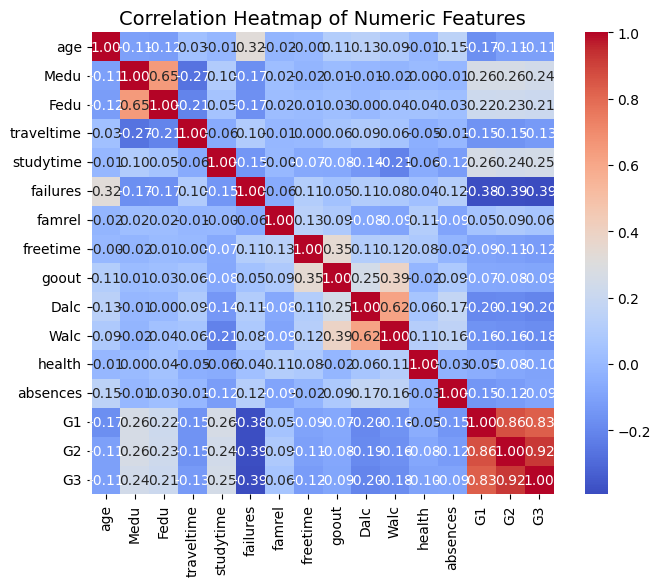

In [58]:
corr=df_corr[num_features].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True,fmt=".2f",cmap="coolwarm",cbar=True,square=True)
plt.title("Correlation Heatmap of Numeric Features",fontsize=14)
plt.show()

Ok so looks like G3 has a  strong positivie correlation with G1(0.83) and G2(0.92)
it looks like it has a strong negative correlation failures (-0.39) which means the more failures the lower the value of G3/ 
Suprisingly, Study time has a weak positive correlation and absences has a very weak or no correlation.
So the important predictors for G3 is G1 , G2 and failures.


Now let's do Group Comparisons 
- Study time vs outcomes 
- absences vs outcomes 
- School support vs outcomes 
- failures vs outcomes
- sex vs outcomes 
- lifestyle score vs outcomes

Study time vs outcomes

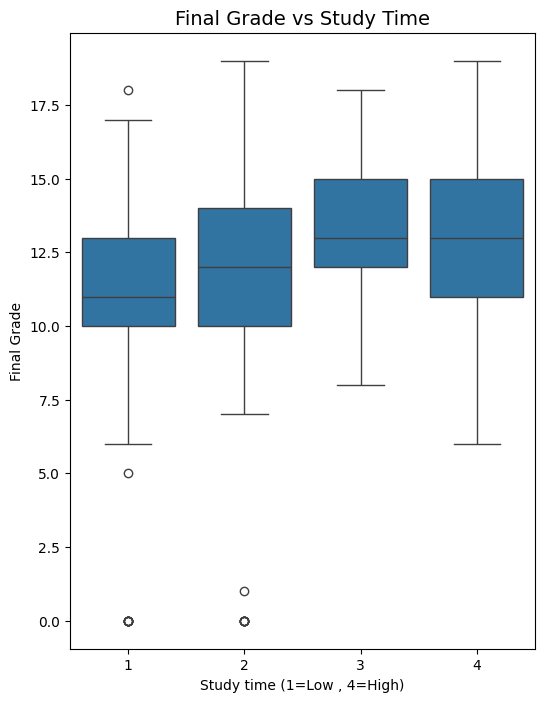

In [59]:
plt.figure(figsize=(6,8))
sns.boxplot(x='studytime',y='G3',data=df_corr)
plt.title("Final Grade vs Study Time",fontsize=14)
plt.xlabel("Study time (1=Low , 4=High)")
plt.ylabel("Final Grade")
plt.show()

So there is a slight difference between different study times and final grade  but it isn't that strong.

Absences vs outcomes

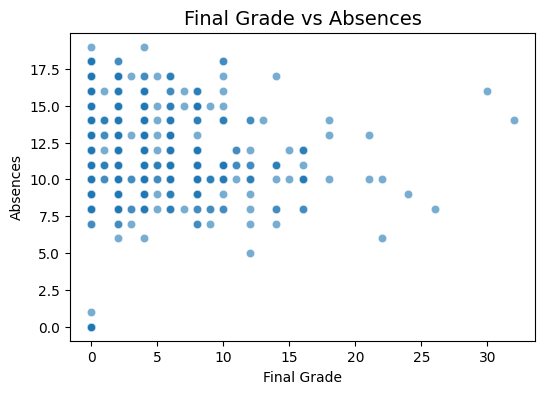

In [60]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='absences',y='G3',data=df_corr,alpha=0.6)
plt.title("Final Grade vs Absences",fontsize=14)
plt.ylabel("Absences")
plt.xlabel("Final Grade")
plt.show()

Looks like most points are clusterd around low absences (0-15) and final grades (5-15), however there is a weak negative correlation and the relationship is not that strong

School Support vs outcomes

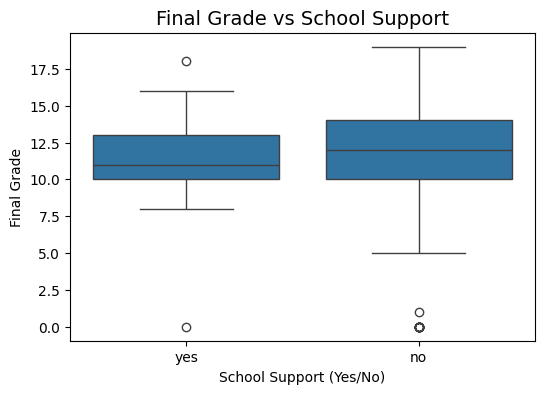

In [61]:
plt.figure(figsize=(6,4))
sns.boxplot(x='schoolsup',y='G3',data=df_corr)
plt.title("Final Grade vs School Support",fontsize=14)
plt.xlabel("School Support (Yes/No)")
plt.ylabel("Final Grade")
plt.show()

Students with no support are performing slightly higher (likely because students with support are already at risk)
So when thinking about it , students with suport are performing slighly better but still it is not that significant

Failures vs Outcomes

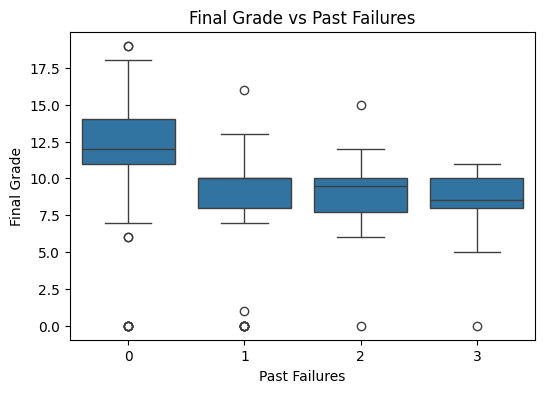

In [62]:
plt.figure(figsize=(6,4))
sns.boxplot(x='failures',y='G3',data=df_corr)
plt.title("Final Grade vs Past Failures")
plt.xlabel("Past Failures")
plt.ylabel("Final Grade")
plt.show()

Here there is a clear negative correlation as faiulres increase , the final grade decreases 

Sex vs Outcomes

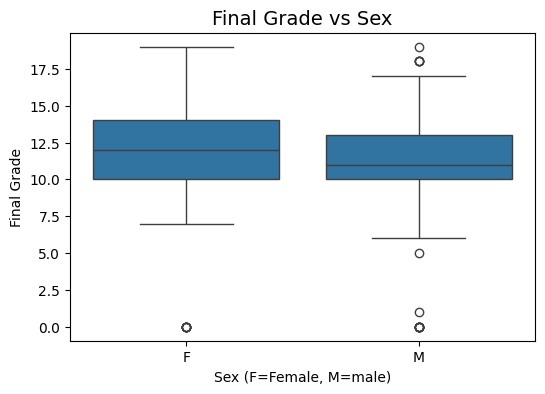

In [63]:
plt.figure(figsize=(6,4))
sns.boxplot(x='sex',y='G3',data=df_corr)
plt.title("Final Grade vs Sex",fontsize=14)
plt.xlabel("Sex (F=Female, M=male)")
plt.ylabel("Final Grade")
plt.show()

In [68]:
df_corr.groupby('sex')['G3'].mean().round(2)

sex
F    12.25
M    11.41
Name: G3, dtype: float64

Looks like female are slightly overperforming but it is still not that significant

Lifestyle score vs outcomes
(Lifestyle score will combine the scores of goout, health and freetime)

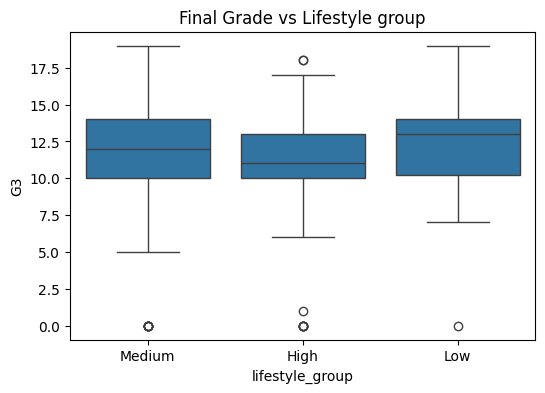

In [66]:
df_corr['Lifestyle_score']=(df_corr['goout'] + df_corr['freetime'] + df_corr['health'])/3
def categorize_lifestyle(score):
    if score <2.5: 
        return 'Low'
    elif score <3.5:
        return 'Medium'
    else:
        return 'High'

df_corr['lifestyle_group']=df_corr['Lifestyle_score'].apply(categorize_lifestyle)
plt.figure(figsize=(6,4))
sns.boxplot(x='lifestyle_group',y='G3',data=df_corr)
plt.title("Final Grade vs Lifestyle group")
plt.show()


Let's calculate the mean to get a good feel about the data 

In [67]:
df_corr.groupby('lifestyle_group')['G3'].mean().round(2)

lifestyle_group
High      11.41
Low       12.51
Medium    12.15
Name: G3, dtype: float64

so there is not much of a difference between them and looks like they are not strong indicators of the final grade

Hypotheses 
1. Absences are negatively correlated with final grades 
   Evidence: The heatmap shows -0.09
   The scatter plot shows no direct relation 
   Conclusion: Hypothesis Supported but weak effect
2. Students with more past failures have lower final grades
   Evidence: the heatmap shows a correlation of -0.39 
   Students with more than 2 failures have lower grades from the box plot 
   Conclusion: Hypothesis Supported with failures being a meaningful predictor
3. Sex isn't correlated to final grade
   Evidence:The boxplot is not that different 
   Means are not that different 
   Conclusion: Hypothesis Supported
4. Study time is strongly correlated to final grade
    Evidence: After 2 hours , there is not that much of a difference. 
    Conclusion: Hypothesis Rejected (Weak effect)
5. Students with  no school support  outperform students with school support
    Evidence: Although the boxplot of students with no school support has better boxplot but when thinking about it school support is for students who actually need it. 
    Conclusion: Hypothesis Rejected

Before going on to the next module , for a one line summary 
acadmic history is far more infleunetial on final outcomes than behavioral , demographic , or support-related factors

### Visualization

Above in the EDA , I already did the correlation heatmap,scatter plot of absences with interpertation, boxplot of studytime and boxplot of schoolsup ,  but I will put it here for simplicity.

Final Grade vs Absencess

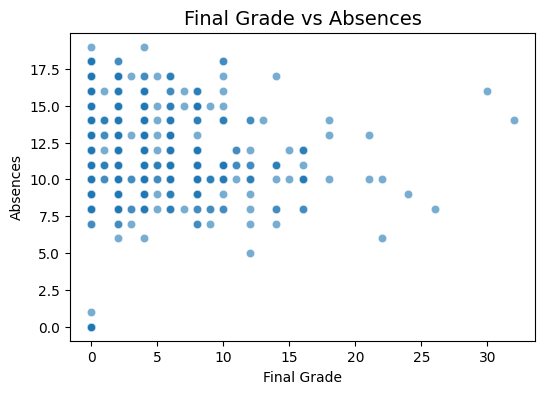

In [69]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='absences',y='G3',data=df_corr,alpha=0.6)
plt.title("Final Grade vs Absences",fontsize=14)
plt.ylabel("Absences")
plt.xlabel("Final Grade")
plt.show()

Correlation Heatmap

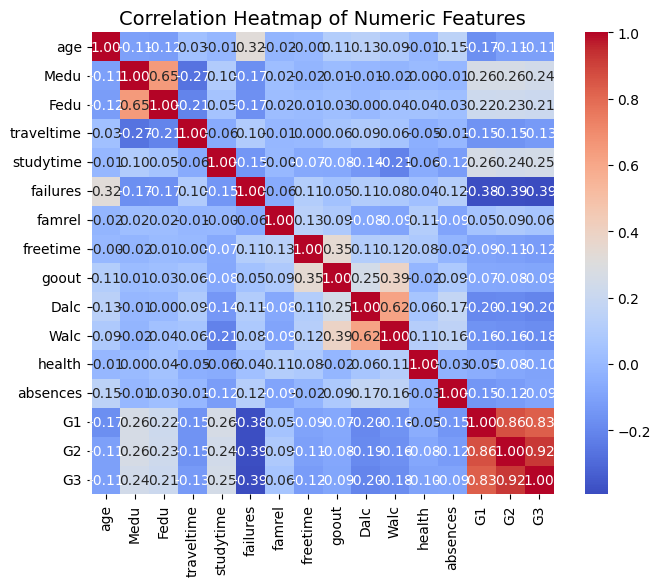

In [70]:
corr=df_corr[num_features].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True,fmt=".2f",cmap="coolwarm",cbar=True,square=True)
plt.title("Correlation Heatmap of Numeric Features",fontsize=14)
plt.show()

Boxplot of school support vs final grade

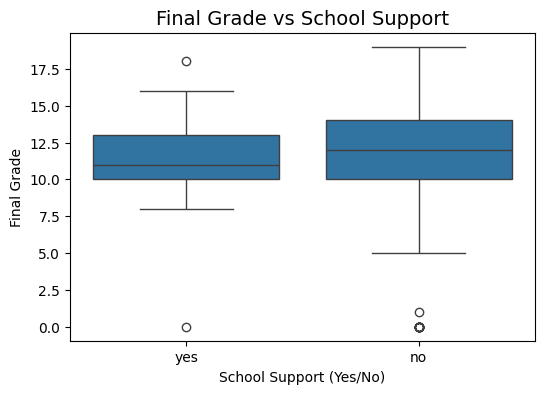

In [71]:
plt.figure(figsize=(6,4))
sns.boxplot(x='schoolsup',y='G3',data=df_corr)
plt.title("Final Grade vs School Support",fontsize=14)
plt.xlabel("School Support (Yes/No)")
plt.ylabel("Final Grade")
plt.show()

Histogram of 3+ numeric variables 

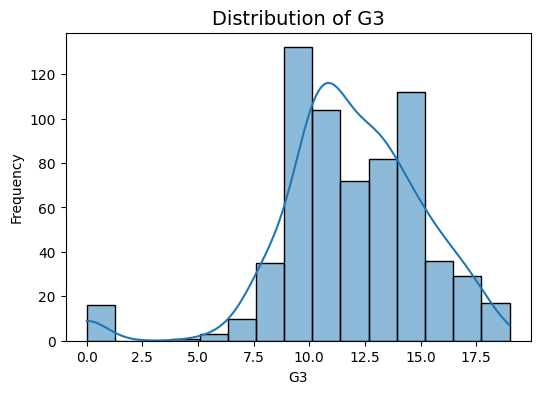

In [76]:
plt.figure(figsize=(6,4))
sns.histplot(df_corr['G3'],bins=15,kde=True)
plt.title(f"Distribution of G3",fontsize=14)
plt.xlabel('G3')
plt.ylabel("Frequency")
plt.show()

So Final grade distribution looks rightly skewed and most grades range from 10 to 15

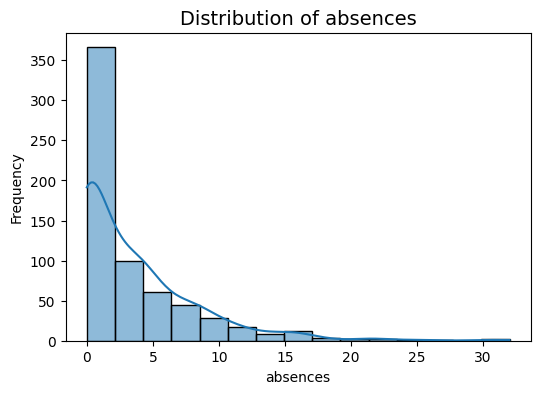

In [77]:
plt.figure(figsize=(6,4))
sns.histplot(df_corr['absences'],bins=15,kde=True)
plt.title(f"Distribution of absences",fontsize=14)
plt.xlabel('absences')
plt.ylabel("Frequency")
plt.show()


Looks like most students don't miss classes as 0 is the most frequent value

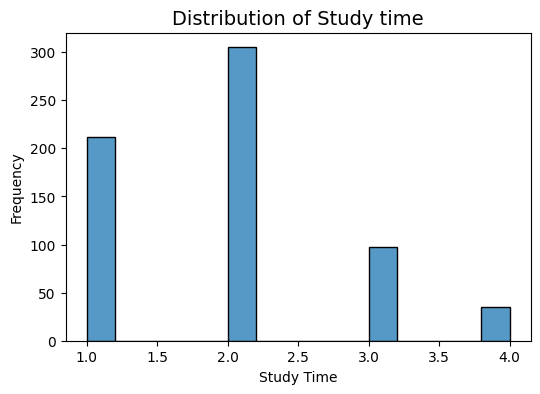

In [75]:
plt.figure(figsize=(6,4))
sns.histplot(df_corr['studytime'],bins=15)
plt.title("Distribution of Study time",fontsize=14)
plt.xlabel("Study Time")
plt.ylabel("Frequency")
plt.show()

So looks like most students study between 2 hours to 2.25 hours 

### Unsupervised Learning (K-Means)

### Supervised Learning

### Model Evaluation and Comparison

### Storytelling and Recommendations